In [51]:
import numpy as np
import matplotlib.pylab as pl
from scipy.optimize import curve_fit
import sympy as sp
import math
import scipy.stats as stats

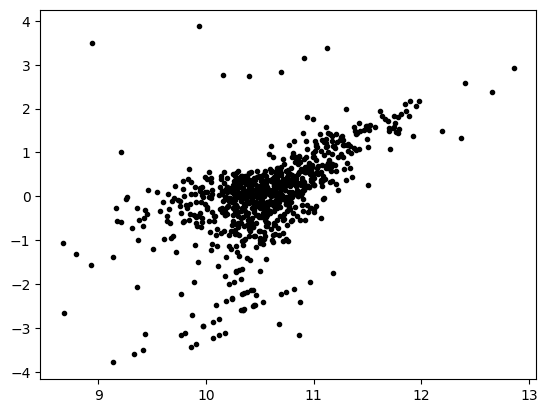

In [52]:
# Estamos importando SFR_BEST como y e MASS_BEST como x
x, y = np.loadtxt('tableProjetoOkiyama.dat', unpack=True)

# Desconsiderando valores muito baixos de SFR
x, y = x[y > -4], y[y > -4]

# Ordena os índices de x em ordem crescente e reorganiza x e y com base nos indices
indices_ordenados = np.argsort(x)
x = x[indices_ordenados]
y = y[indices_ordenados]

# Plot da amostra (apenas para o visual)
pl.plot(x, y, 'k.')
pl.show()

x1 = x       #Será utilizado para fazer a separacao de massas
y1 = y

In [53]:
# Definindo a funcao para fazer os ajustes
def reta(x, b0, b1):
    ''' 
    Realiza um ajuste de reta.

    Esta função calcula os valores de y de acordo com a equação de uma reta,
    usando os coeficientes b0 (coeficiente linear) e b1 (coeficiente angular).

    Parâmetros:
    x (array-like): Uma sequência de valores da variável independente.
    b0 (float): Coeficiente linear da reta.
    b1 (float): Coeficiente angular da reta.

    Retorna:
    numpy.ndarray: Um array contendo os valores calculados de y usando a reta.

    '''
    y = b0 + b1*x
    return y

In [54]:
#Parametros de um ajuste linear basico
parameters, covariance = curve_fit(reta, x, y, p0=[0, 0])
print(parameters)

[-11.41484814   1.08156715]


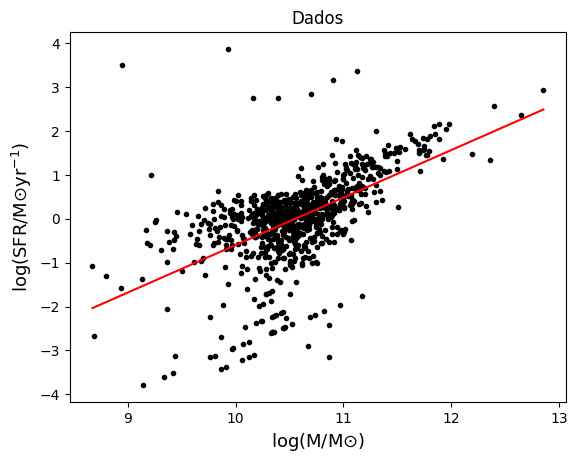

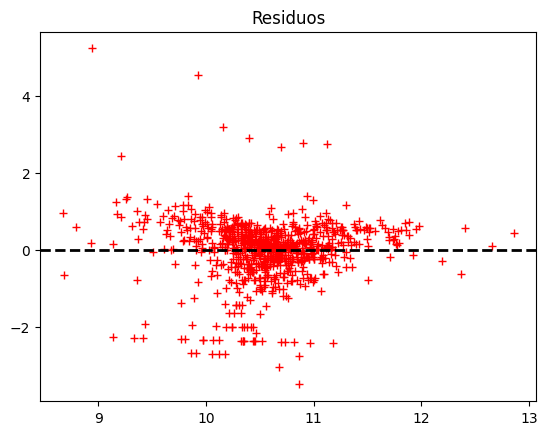

In [55]:
#Ajuste linear de toda a amostra e plot do ajuste
y_modelo = reta(x, parameters[0], parameters[1])
residuo = y - y_modelo

pl.title('Dados')
pl.xlabel('log(M/M$\odot$)', fontsize = 13)
pl.ylabel('log(SFR/M$\odot$yr$^{-1}$)', fontsize = 13)
pl.plot(x, y, 'k.')
pl.plot(x, y_modelo, 'r-')
pl.show()

pl.title('Residuos')
pl.plot(x,residuo, 'r+')
pl.axhline(0, color='k', ls='--', lw=2)
pl.show()

In [56]:
#Ajuste separado por parte para calcular a derivada

# Definindo o numero de partes em que dividimos a massa (arbitrário)
divisao = math.ceil(len(y) / 100)
derivadas = np.array([])
a = np.array([])
b = np.array([])



for i in range(divisao):
    
    # Calculo dos índices de início e fim para a parte atual
    inicio = i * len(x) // divisao
    fim = (i + 1) * len(x) // divisao
    a = np.append(a,inicio)
    b = np.append(b,fim)
    x_parte = x[inicio:fim]
    y_parte = y[inicio:fim]

    # Ajuste a reta à parte atual
    parameters, covariance = curve_fit(reta, x_parte, y_parte, p0=[0, 0])

    # Calculo do modelo usando os parâmetros ajustados
    y_modelo = reta(x_parte, parameters[0], parameters[1])
    
    
    # Plote dos dados e o modelo (nao necessario)
    #pl.figure()
    #pl.title('Dados - Parte ' + str(i+1))
    #pl.plot(x_parte, y_parte, 'k.')
    #pl.plot(x_parte, y_modelo, 'r-')
    #pl.show()

    # Plote dos resíduos (nao necessario)
    #pl.figure()
    #pl.title('Resíduos - Parte ' + str(i+1))
    #pl.plot(x_parte, y_parte - y_modelo, 'r+')
    #pl.axhline(0, color='k', ls='--', lw=2)
    #pl.show()
    
    # Calcula a derivada para o ajuste atual
    x_simbolico = sp.symbols('x')
    y_modelo_simbolico = parameters[0] * x_simbolico + parameters[1]
    derivada_y_modelo = sp.diff(y_modelo_simbolico, x_simbolico)
    derivadas = np.append(derivadas, derivada_y_modelo)
    print(f'A derivada de y_modelo na parte {i} é: {derivada_y_modelo}')

A derivada de y_modelo na parte 0 é: -5.99419456438858
A derivada de y_modelo na parte 1 é: -16.4728457763914
A derivada de y_modelo na parte 2 é: 1.99245749064348
A derivada de y_modelo na parte 3 é: 12.6450872184925
A derivada de y_modelo na parte 4 é: -33.9801495365269
A derivada de y_modelo na parte 5 é: -9.76314333937924
A derivada de y_modelo na parte 6 é: -4.81877020341715
A derivada de y_modelo na parte 7 é: -15.0209918087016
A derivada de y_modelo na parte 8 é: -11.4108013230603


In [57]:
# Obtem o ponto maximo da derivada e a massa da galaxia relacionada
print(f'A derivada maxima é: {derivadas.max()} e a massa media dessa amostra é: {x[388]}')

A derivada maxima é: 12.6450872184925 e a massa media dessa amostra é: 10.5067


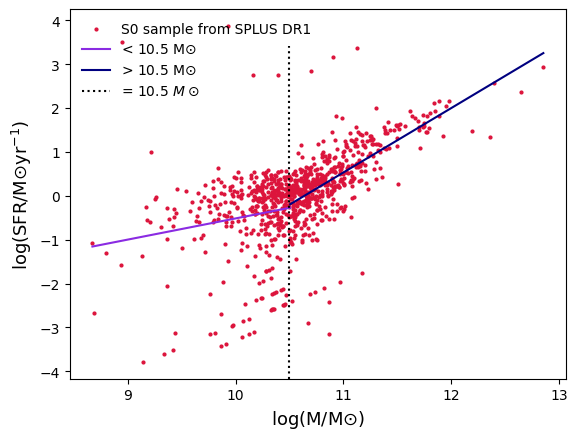

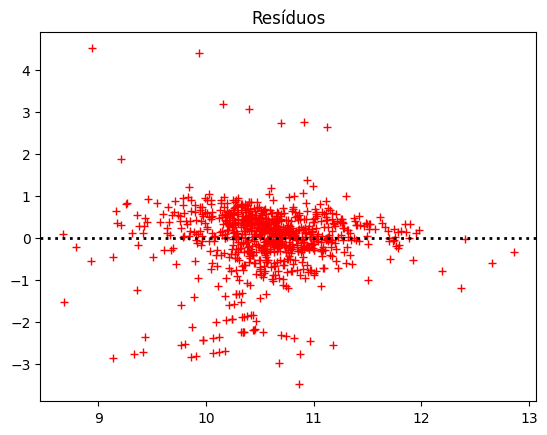

In [58]:
# Dividiremos a relação linear em massas menores e massas maiores, divididas pela derivada maxima
# Faremos o mesmo processo de ajuste linear antes feito para toda a amostra

# Massas menores
x_parte_m = x1[0:389]
y_parte_m = y1[0:389]
parameters, covariance = curve_fit(reta, x_parte_m, y_parte_m, p0=[0, 0])
y_modelo_m = reta(x_parte_m, parameters[0], parameters[1])

# Plot base e dos dados da primeira amostra
pl.figure(1)
pl.xlabel('log(M/M$\odot$)', fontsize = 13)
pl.ylabel('log(SFR/M$\odot$yr$^{-1}$)', fontsize = 13)
pl.scatter(x_parte_m, y_parte_m, color='crimson', s=4, label='S0 sample from SPLUS DR1',marker='o')
pl.plot(x_parte_m, y_modelo_m, linestyle = '-', color = 'blueviolet', label = '< 10.5 M$\odot$')

# Plot dos resíduos da primeira amostra
pl.figure(2)
pl.title('Resíduos ')
pl.plot(x_parte_m, y_parte_m - y_modelo_m, 'r+')



# Massas maiores
x_parte_M = x1[388:]
y_parte_M = y1[388:]
parameters, covariance = curve_fit(reta, x_parte_M, y_parte_M, p0=[0, 0])
y_modelo_M = reta(x_parte_M, parameters[0], parameters[1])

# Plot da segunda amostra
pl.figure(1)
pl.scatter(x_parte_M, y_parte_M, color = 'crimson',s=4,marker='o')
pl.plot(x_parte_M, y_modelo_M, linestyle='-',color= 'navy', label = '> 10.5 M$\odot$')
pl.axvline(x=10.5, color='k', linestyle=':',ymax = 0.9, label='= 10.5 $M\odot$')
leg = pl.legend(loc='upper left', fontsize=10, frameon= False)
pl.savefig('MassSFR.eps', format='eps')

# Plote dos resíduos da segunda amostra
pl.figure(2)
pl.title('Resíduos')
pl.plot(x_parte_M, y_parte_M - y_modelo_M, 'r+')
pl.axhline(0, color='k', ls=':', lw=2)

pl.show()


In [59]:
#Definindo o erro de 3 sigma (99.7%)
sigma3_m = 3 * (np.std(y_parte_m - y_modelo_m))
sigma3_M = 3 * (np.std(y_parte_M - y_modelo_M))

In [60]:
#Calculando o chi_2 separadamente
chi2_m = np.sum(((y_parte_m - y_modelo_m)**2) / (sigma3_m**2))
chi2_M = np.sum(((y_parte_M - y_modelo_M)**2) / (sigma3_M**2))

In [61]:
#chi2_pdf ------- valor ideal proximo a 1-----------
chi2_m_pdf = chi2_m/(len(x_parte_m) - 1)
chi2_M_pdf = chi2_M/(len(x_parte_M) - 1)
print(chi2_m_pdf,chi2_M_pdf)

0.11139747995418098 0.1113411548194157
